In [1]:
# Modules
import numpy as np
import xarray as xr
import pandas as pd

from data import data_loader
from data import gesla_preprocessing
from data import era5_preprocessing
from data import preprocessing

Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Add predictor sp to model input features
Get overlapping timeseries of ERA5 and GESLA
Add predictor tp to model input features
Get overlapping timeseries of ERA5 and GESLA
Add predictor u10 to model input features
Get overlapping timeseries of ERA5 and GESLA
Assert that timeinterval of all predictors are the same
Time-interval is the same
Time-interval is the same
Time-interval is the same
All Time-intervals are the same
Prepare input data for model training
Data is prepared as follows
X.shape : (903, 51183)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters
Tested Hyperparameters: {'n_estimators': [0, 111, 222, 333, 444, 555, 666, 777, 888, 1000], 'max_depth': [5, 17, 30, 42, 55, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Optimize Hyperparameters using RandomSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
Va

Saved Hyperparameters
Fit model
Save model
Evaluate Model 

test_score: 0.8849557522123894
train_score: 1.0
importance: [4.49792796e-05 1.43662895e-05 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
saved importance to : results/random_forest/rf004/importance_95_0
Show Confusion Matrix 



D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf004.py:241: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig.show()


saved cf matrix to : results/random_forest/rf004/cf_matrix_95_0.jpg
Metric values 

tnr: 0.9644670050761421
tpr: 0.3448275862068966
gmean: 0.5766930113471125
wacc: 0.6546472956415194
precision: 0.5882352941176471
recall: 0.3448275862068966
fmeasure: 0.4347826086956522
saved cf metrics to : cf_metrics_95_0.pkl
Show AUROC 

AUC: 0.897426921057238


D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf004.py:280: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saved AUROC to : results/random_forest/rf004/AUROC_95_0.jpg
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Add predictor sp to model input features
Get overlapping timeseries of ERA5 and GESLA
Add predictor tp to model input features
Get overlapping timeseries of ERA5 and GESLA
Assert that timeinterval of all predictors are the same
Time-interval is the same
Time-interval is the same
All Time-intervals are the same
Prepare input data for model training
Data is prepared as follows
X.shape : (903, 34122)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters
Tested Hyperparameters: {'n_estimators': [0, 111, 222, 333, 444, 555, 666, 777, 888, 1000], 'max_depth': [5, 17, 30, 42, 55, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Optimize Hyperparameters using RandomSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
Va

Saved Hyperparameters
Fit model
Save model
Evaluate Model 

test_score: 0.8716814159292036
train_score: 1.0
importance: [1.53746934e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
saved importance to : results/random_forest/rf004/importance_95_1
Show Confusion Matrix 



D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf004.py:241: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig.show()


saved cf matrix to : results/random_forest/rf004/cf_matrix_95_1.jpg
Metric values 

tnr: 0.9543147208121827
tpr: 0.3103448275862069
gmean: 0.5442119417041821
wacc: 0.6323297741991948
precision: 0.5
recall: 0.3103448275862069
fmeasure: 0.3829787234042554
saved cf metrics to : cf_metrics_95_1.pkl
Show AUROC 

AUC: 0.8823735340451603


D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf004.py:280: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saved AUROC to : results/random_forest/rf004/AUROC_95_1.jpg
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Add predictor tp to model input features
Get overlapping timeseries of ERA5 and GESLA
Add predictor u10 to model input features
Get overlapping timeseries of ERA5 and GESLA
Assert that timeinterval of all predictors are the same
Time-interval is the same
Time-interval is the same
All Time-intervals are the same
Prepare input data for model training
Data is prepared as follows
X.shape : (903, 34122)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters
Tested Hyperparameters: {'n_estimators': [0, 111, 222, 333, 444, 555, 666, 777, 888, 1000], 'max_depth': [5, 17, 30, 42, 55, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Optimize Hyperparameters using RandomSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
Va

Saved Hyperparameters
Fit model
Save model
Evaluate Model 

test_score: 0.8539823008849557
train_score: 0.9556868537666174
importance: [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.42113994e-05
 1.23892835e-05 0.00000000e+00]
saved importance to : results/random_forest/rf004/importance_95_2
Show Confusion Matrix 



D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf004.py:241: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig.show()


saved cf matrix to : results/random_forest/rf004/cf_matrix_95_2.jpg
Metric values 

tnr: 0.8934010152284264
tpr: 0.5862068965517241
gmean: 0.7236835195810496
wacc: 0.7398039558900753
precision: 0.4473684210526316
recall: 0.5862068965517241
fmeasure: 0.5074626865671642
saved cf metrics to : cf_metrics_95_2.pkl
Show AUROC 

AUC: 0.8722212497812007
saved AUROC to : results/random_forest/rf004/AUROC_95_2.jpg


D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf004.py:280: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Add predictor sp to model input features
Get overlapping timeseries of ERA5 and GESLA
Add predictor tp to model input features
Get overlapping timeseries of ERA5 and GESLA
Add predictor u10 to model input features
Get overlapping timeseries of ERA5 and GESLA
Add predictor v10 to model input features
Get overlapping timeseries of ERA5 and GESLA
Assert that timeinterval of all predictors are the same
Time-interval is the same
Time-interval is the same
Time-interval is the same
Time-interval is the same
All Time-intervals are the same
Prepare input data for model training
Data is prepared as follows
X.shape : (903, 68244)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters
Tested Hyperparameters: {'n_estimators': [0, 111, 222, 333, 444, 555, 666, 777, 888, 1000], 'max_depth': [5, 17, 30, 42, 55, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
Optimize Hyperparame

d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
Va

Saved Hyperparameters
Fit model
Save model
Evaluate Model 

test_score: 0.8982300884955752
train_score: 0.9970457902511078
importance: [0.         0.         0.         ... 0.         0.00013625 0.00028398]
saved importance to : results/random_forest/rf004/importance_95_3
Show Confusion Matrix 



D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf004.py:241: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig.show()


saved cf matrix to : results/random_forest/rf004/cf_matrix_95_3.jpg
Metric values 

tnr: 0.9543147208121827
tpr: 0.5172413793103449
gmean: 0.7025745956758329
wacc: 0.7357780500612638
precision: 0.625
recall: 0.5172413793103449
fmeasure: 0.5660377358490567
saved cf metrics to : cf_metrics_95_3.pkl
Show AUROC 

AUC: 0.8993523542797129


D:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf004.py:280: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saved AUROC to : results/random_forest/rf004/AUROC_95_3.jpg


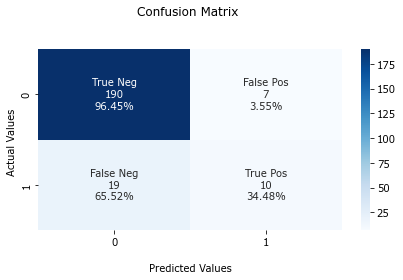

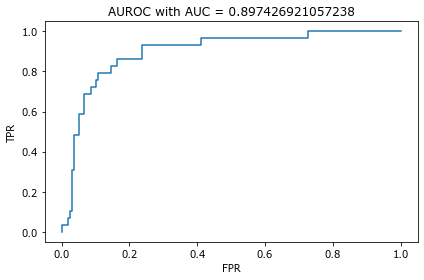

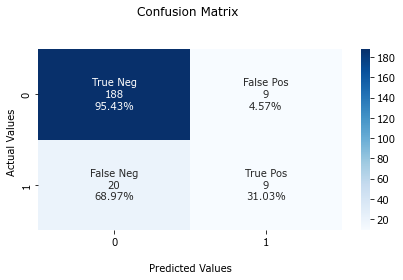

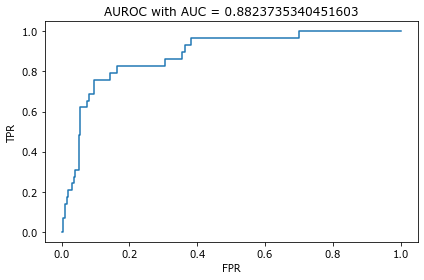

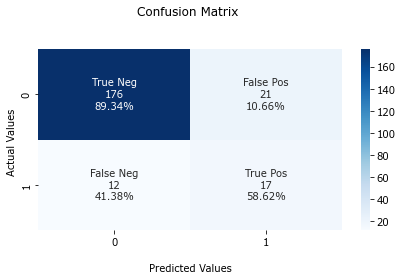

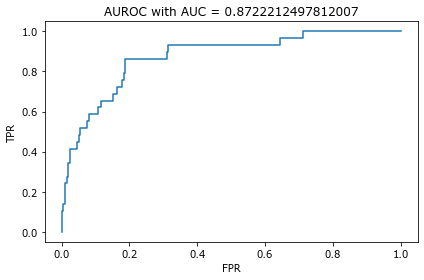

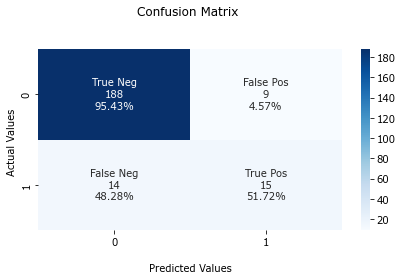

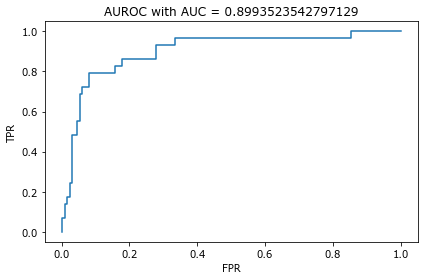

In [2]:
%run models/random_forest/rf004.py

In [ ]:

# ---
# Preprocessing
# ---

# Get timeseries of predictor and predictand
season = "winter" # ["winter", "autumn",] 
predictor = "sp" # ["sp", "tp", "u10", "v10",]
percentile = 0.95 # [0.95, 0.99,] 
era5_import = "preprocess1" # ["preprocess1"]
range_of_years = "1999-2008" # ["1999-2008", "2009-2018", "2019-2022",]
subregion = "lon-0530_lat7040" # ["lon-0530_lat7040"]
station_names = ["hanko-han-fin-cmems",]

X, Y, t = preprocessing.preprocess(season,
predictor,
percentile,
era5_import,
range_of_years,
subregion,
station_names,
)

lats, lons = preprocessing.get_lonlats(range_of_years, subregion, season, predictor, era5_import)

print(f"X: {X.shape}")
print(f"Y: {Y.shape}")
print(f"t: {t.shape}")
print(f"lats: {lats.shape}")
print(f"lons: {lons.shape}")

In [13]:
#---
# Preprocessing
#--- 

# Handle NaN values: 
# Insert numerical value that is not in data.
# ML will hopefully recognize it.
X[np.where(np.isnan(X))] = -999

# Save number of lat/lon for interpreting model output later
ndim = X.shape[0]
nlat = X.shape[1]
nlon = X.shape[2]
nclasses = nlat * nlon

# Prepare shape for model
X = X.reshape(ndim, nclasses) # (ndim, nclasses)
y = Y[:, 0] # Select only one station

print(X.shape)
print(y.shape)

(903, 17061)
(903,)


In [ ]:
#--- 
# Train Model
#---


In [ ]:
#---
# Model-runs / Test-runs to create results
#---

# Random Forests
#---
from models.random_forest import rf001
from models.random_forest import rf002

predictors = ["sp", "tp", "u10", "v10",]
percentiles = [0.95, 0.99]

for percentile in percentiles:
    rf001.run(predictor="sp", percentile=percentile) # Only adjusted for SP

for percentile in percentiles:
    for predictor in predictors:
        rf002.run(predictor, percentile)

Load importance of model run: rf002
Get longitudes and latitudes of preprocess: preprocess1
Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Plot importance map
Load importance of model run: rf002
Get longitudes and latitudes of preprocess: preprocess1
Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Plot importance map


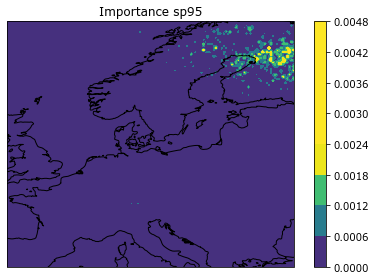

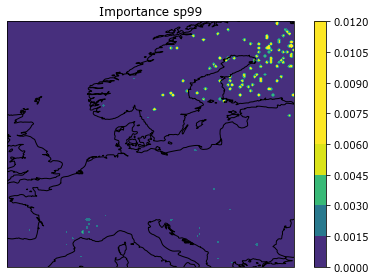

In [ ]:
#---
# Visualization
#---

# Metric: Importance
#---
from data import preprocessing
import numpy as np

# Initialize
model_run = "rf002"
predictors = ["sp", "tp", "u10", "v10",]
percentiles = [0.95, 0.99]
range_of_years = "1999-2008"
subregion = "lon-0530_lat7040"
season = "winter"
preprocess = "preprocess1"

for predictor in predictors[:1]:
    for percentile in percentiles:
        # Load importance of model run
        print(f"Load importance of model run: {model_run}")

        folder = f"results/random_forest/{model_run}/{predictor}/"
        fname = f"importances_{predictor}{str(percentile)[-2:]}"
        importance = np.load(f"{folder}{fname}.npy")

        # Load lat lons
        print(f"Get longitudes and latitudes of preprocess: {preprocess}")
        lats, lons = preprocessing.get_lonlats(
            range_of_years,
            subregion,
            season,
            predictor,
            preprocess,
        )

        # Plot importance-map
        print(f"Plot importance map")
        from models import evaluation
        tflag = f"{predictor}{str(percentile)[-2:]}"
        fig = evaluation.importance_map(importance, lons, lats, tflag=tflag)

        # # Save importance-map
        # folder = f"results/random_forest/rf002/{predictor}/"
        # fname = f"importance_map_{predictor}{str(percentile)[-2:]}"
        # fig.savefig(f"{folder}{fname}.jpg")

In [3]:
# Forecast

In [ ]:
# Postprocessing

In [ ]:
# Diagnostics